In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt

## Ⅰ. Validation set

* Train set : 매겨변수를 학습시키기 위한 set
* Validation set : 하이퍼파라미터 성능 평가를 위한 set
* Test set : 마지막으로 쓰는 범용 성능 평가를 위한 set

<img src="../img/validation.png"/>

1. 하이퍼파라미터 값의 범위를 설정 (보통 LogScale로 설정)
2. 설정된 범위에서 하이퍼파라미터 값을 무작위로 추출
3. 추출한 하이퍼파라미터 값을 사용하여 학습하여 검증데이터로 평가
4. 2-3 단계를 반복하여 결과값들을 보고 탐색 범위를 좁힘

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.81) | lr:0.006401778660942638, weight decay:6.917928076690825e-05
Best-2(val acc:0.8) | lr:0.005853190273825642, weight decay:8.995589445041797e-07
Best-3(val acc:0.78) | lr:0.007829571293830835, weight decay:2.5720240217412643e-06
Best-4(val acc:0.76) | lr:0.007573755451174728, weight decay:7.826639893566103e-05
Best-5(val acc:0.74) | lr:0.005893962951099664, weight decay:2.7583313176201382e-05


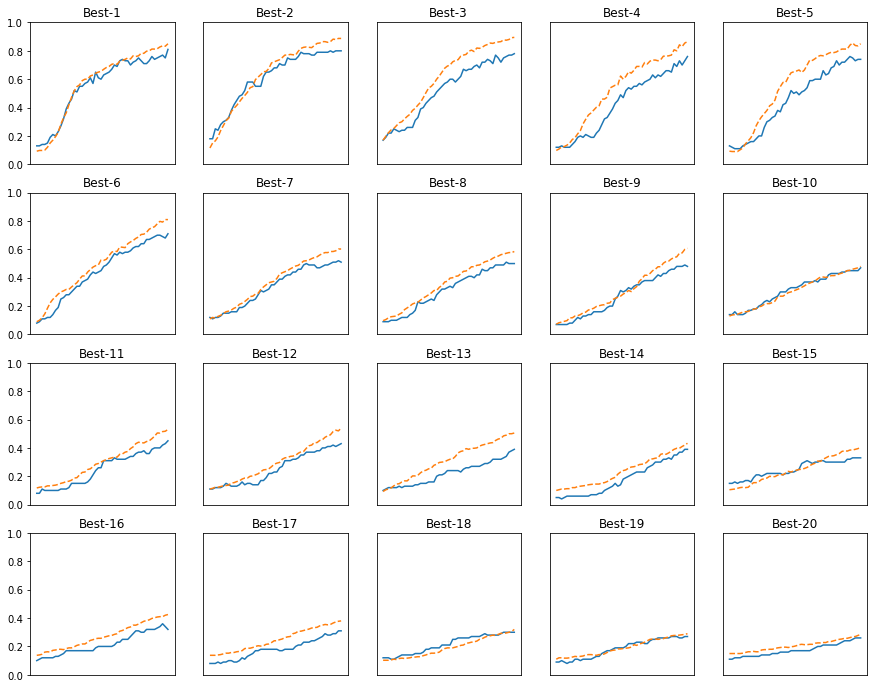

In [4]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train, t_train = x_train[:500], t_train[:500]

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_train, t_train = shuffle_dataset(x_train, t_train)
x_val, t_val = x_train[:validation_num], t_train[:validation_num]
x_train, t_train = x_train[validation_num:], t_train[validation_num:]

def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    
    # set hyperparameter
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)

    # train
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(15,12))
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    if i < 5:
        print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()